In [3]:
import numpy as np
import matplotlib.pyplot as plt

### What is the difference beween L1 and L2?

L1 adds the summation of the absolute values of the weights to the loss function, while L2 adds the sum of the squared values of the weights. 
Both L1 and L2 help strink weights toward smaller values, but L1 tends to shrink some weights to excatly 0, whereas L2 distributes the pentaly across all weights. Since L1 strinks some weights to 0, it leading to feature selection.

In [124]:
# Synthetic data
np.random.seed(42)
X = np.random.randn(100, 3)
X[:, 1] = X[:, 0]*2
y = 3*X[:, 0] + 2*X[:, 1] - 6*X[:, 2] + np.random.randn(100) * 0.5

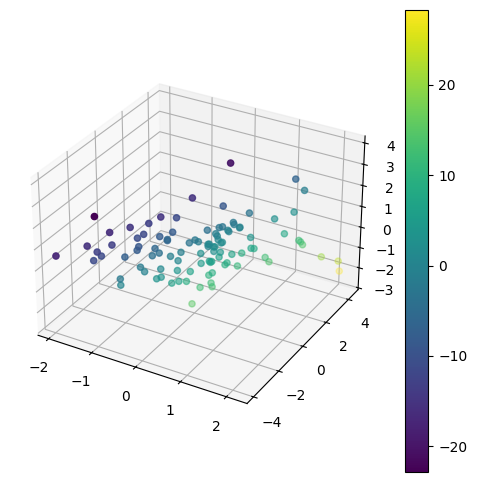

In [125]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
p = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
fig.colorbar(p)

Let's say we want to have a linear regression model to predict y

In [48]:
def model_no_reg(X, y, learning_rate=0.1, epochs=50, seed=15):
    """
    Use MSE as the loss function
    
    Params:
        X (np.array): features matrix
        y (np.array): targets
        learning_rate (float): the learning rate
        epochs (int): the iteration number of optimization
        seed (int): random seed
    Returns:
        w (np.array): weights of linear regression
    """
    np.random.seed(seed)
    # initialize w
    w = np.random.rand(X.shape[1]) # shape: (3,)

    # optimization
    for epoch in range(epochs):
        # calculate prediction
        predict = X @ w # shape: (100,)

        # calulate error
        error = y - predict # shape: (100,)

        # calculate gradient
        gradient = -2 * X.T @ error / len(y) # shape: (3,)

        # update w
        w -= gradient * learning_rate
        

    return(w)
    

In [86]:
def model_l1_reg(X, y, learning_rate=0.1, epochs=50, seed=15):
    """
    Use MSE as the loss function
    
    Params:
        X (np.array): features matrix
        y (np.array): targets
        learning_rate (float): the learning rate
        epochs (int): the iteration number of optimization
        seed (int): random seed
    Returns:
        w (np.array): weights of linear regression
    """
    np.random.seed(seed)
    # initialize w
    w = np.random.rand(X.shape[1]) # shape: (3,)

    # optimization
    for epoch in range(epochs):
        # calculate prediction
        predict = X @ w # shape: (100,)

        # calulate error
        error = y - predict # shape: (100,)

        # calculate gradient
        gradient = -2 * X.T @ error / len(y) + np.sign(w) # shape: (3,)

        # update w
        w -= gradient * learning_rate
        

    return(w)
    

In [87]:
def model_l2_reg(X, y, learning_rate=0.1, epochs=50, seed=15):
    """
    Use MSE as the loss function
    
    Params:
        X (np.array): features matrix
        y (np.array): targets
        learning_rate (float): the learning rate
        epochs (int): the iteration number of optimization
        seed (int): random seed
    Returns:
        w (np.array): weights of linear regression
    """
    np.random.seed(seed)
    # initialize w
    w = np.random.rand(X.shape[1]) # shape: (3,)

    # optimization
    for epoch in range(epochs):
        # calculate prediction
        predict = X @ w # shape: (100,)

        # calulate error
        error = y - predict # shape: (100,)

        # calculate gradient
        gradient = -2 * X.T @ error / len(y) + 2 * w # shape: (3,)

        # update w
        w -= gradient * learning_rate
        

    return(w)
    

In [120]:
def model_l1_l2_reg(X, y, learning_rate=0.1, epochs=50, seed=15):
    """
    Use MSE as the loss function
    
    Params:
        X (np.array): features matrix
        y (np.array): targets
        learning_rate (float): the learning rate
        epochs (int): the iteration number of optimization
        seed (int): random seed
    Returns:
        w (np.array): weights of linear regression
    """
    np.random.seed(seed)
    # initialize w
    w = np.random.rand(X.shape[1]) # shape: (3,)

    # optimization
    for epoch in range(epochs):
        # calculate prediction
        predict = X @ w # shape: (100,)

        # calulate error
        error = y - predict # shape: (100,)

        # calculate gradient
        gradient = -2 * X.T @ error / len(y) + np.sign(w)  + 2 * w # shape: (3,)

        # update w
        w -= gradient * learning_rate
        

    return(w)
    

In [121]:
def get_w_with_epochs(epochs=50, seed=15):
    w_no_reg = model_no_reg(X, y, epochs=epochs, seed=seed)
    w_l1_reg = model_l1_reg(X, y, epochs=epochs, seed=seed)
    w_l2_reg = model_l2_reg(X, y, epochs=epochs, seed=seed)
    w_l1_l2_reg = model_l1_l2_reg(X, y, epochs=epochs, seed=seed)
    print("no reg:")
    print(w_no_reg)
    print("l1 reg:")
    print(w_l1_reg)
    print("l2 reg:")
    print(w_l2_reg)
    print("elastic net reg:")
    print(w_l1_l2_reg)

In [126]:
get_w_with_epochs(50)

no reg:
[ 2.00187709  2.4850147  -6.04648109]
l1 reg:
[ 0.12516523  3.33159099 -5.67258413]
l2 reg:
[ 1.13998253  2.27994339 -3.39582907]
elastic net reg:
[ 0.87683643  2.25364404 -3.18634031]


In [127]:
get_w_with_epochs(50, 60)

no reg:
[ 1.56030165  2.70580245 -6.04648085]
l1 reg:
[-0.03491054  3.31537808 -5.66706438]
l2 reg:
[ 1.13997623  2.27994654 -3.39582907]
elastic net reg:
[ 0.87683012  2.25364719 -3.18634031]


### Summary

As you can see, L1 regularization shrinks w1 to a small value, as expected, since x1 and x2 are correlated. In contrast, L2 regularization distributes the penalty across all features. Elastic Net combines both, resulting in small weights but not forcing w1 to zero.